In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf 
from tensorflow.keras import datasets, layers, models

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train.shape

170498071/170498071 [==============================] - 14s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
def plot_sample(X, y, index):

  plt.figure(figsize=(15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

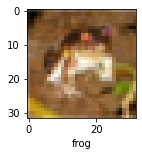

In [8]:
plot_sample(X_train, y_train, 0)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [12]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 5ms/step - loss: 1.4715 - accuracy: 0.4706
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1128 - accuracy: 0.6107
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9867 - accuracy: 0.6598
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9068 - accuracy: 0.6864
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8441 - accuracy: 0.7093
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7931 - accuracy: 0.7258
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7453 - accuracy: 0.7426
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7039 - accuracy: 0.7571
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6644 - accuracy: 0.7700
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.63

In [14]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.9495 - accuracy: 0.6927


[0.9494728446006775, 0.6927000284194946]

In [15]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

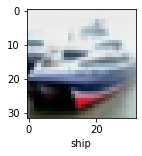

In [16]:
plot_sample(X_test, y_test, 1)

In [17]:
y_pred = cnn.predict(X_test)
y_pred[1]

313/313 [==============================] - 1s 2ms/step


array([2.5312642e-03, 9.1860108e-02, 4.8737274e-06, 1.5683885e-07,
       3.4594646e-07, 1.6477713e-08, 3.7445740e-09, 3.6590102e-09,
       9.0355217e-01, 2.0510044e-03], dtype=float32)

In [18]:
np.argmax(y_pred[1])

8

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

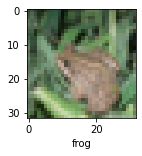

In [21]:
plot_sample(X_test, y_test, 4)

In [22]:
classes[y_classes[4]]

'frog'

In [24]:
from sklearn.metrics import classification_report 
print('Classification Report \n', classification_report(y_test, y_classes))

Classification Report 
               precision    recall  f1-score   support

           0       0.65      0.83      0.73      1000
           1       0.78      0.84      0.81      1000
           2       0.74      0.46      0.56      1000
           3       0.49      0.52      0.50      1000
           4       0.66      0.61      0.63      1000
           5       0.57      0.65      0.61      1000
           6       0.80      0.73      0.76      1000
           7       0.72      0.78      0.75      1000
           8       0.81      0.74      0.77      1000
           9       0.75      0.79      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

